The daily returns of composite stocks of the Dow Jones Industrial Average (DJIA), also known as Dow 30, is used for the analysis. This index was selected because there are only 30 stocks to work with, making it easier for demonstration, and still rather diverse in terms of sector representation.

<a href='url'>https://www.portfolioconstructs.com/blog-detail/25?title=PCA%20for%20Stock%20Market%20Analysis%20with%20scikit-learn</a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Apply and get your own alpha vantage API key
api_key = '' # https://www.alphavantage.co/support/#api-key
stock = 'DIA'
start_dt = '2021-01-01'
end_dt = '2022-02-18'

In [3]:
# retrieve the data from alpha vantage
# select the closing price and save as a list
def retrieve_data(api_key, stock_symbol, start_dt, end_dt):
    """
    Input: api_key, stock symbol
    Output: Dataframe of closing price of a stock
    """
    # https://www.portfolioconstructs.com/blog-detail/22?title=Retrieving%20Public%20Financial%20Data%20Using%20Python
    from alpha_vantage.timeseries import TimeSeries

    ts = TimeSeries(key=api_key, output_format='pandas')
    # it returns the complete available historical data
    data, meta_data = ts.get_daily(stock_symbol, outputsize='full')
    
    # Filter out the data in the specified time period
    selected_data = data[(data.index >= start_dt) & (data.index <= end_dt)]
    selected_data = selected_data.sort_index(ascending=True)
    
    # Select the closing price and save as a df
    data_price = pd.DataFrame(selected_data['4. close'])
    data_price.index = pd.to_datetime(selected_data.index)
    return data_price

In [4]:
# Calculate return of the data_price
def cal_return(data_price, stock_symbol):
    """
    This function computes the return of the stock index
    Input: the daily price
    Output: the return = (current close price/previous close price) - 1
    """
    date_list = list(data_price.index)
    print(f'{len(date_list)} observations loaded for {stock_symbol}')

    ret = []
    for dt in range(len(date_list)):
        if dt == 0:
            print("-----")
            continue
        else:
            # the original data type is numpy.ndarray. [0][0].tolist() converts it to float
            current = data_price[data_price.index == date_list[dt]].values[0][0].tolist()
            previous = data_price[data_price.index == date_list[dt - 1]].values[0][0].tolist()
            ret.append(current/previous - 1)
    
    return ret

In [6]:
import time

DJI = pd.read_csv('DJIA_symbols.csv')
DJI_symbols = DJI['Symbol'].tolist()
print(DJI_symbols)

DJIA_data = retrieve_data(api_key, 'DIA', start_dt, end_dt)
ret = cal_return(DJIA_data, 'DIA')
# load daily return into new data frame
daily_returns = {}
daily_returns['DIA'] = ret

time.sleep(15)
    
for symbol in DJI_symbols:
    try:
        data_price = retrieve_data(api_key, symbol, start_dt, end_dt)
        daily_returns[symbol] = cal_return(data_price, symbol)
        time.sleep(15) # to handle limited number of calls permitted in AlphaVantage's free tier
    except:
        print(f'Fail to load {symbol}.')

['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'DWDP', 'XOM', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MEK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'V', 'WMT', 'WBA']
286 observations loaded for DIA
-----
286 observations loaded for MMM
-----
286 observations loaded for AXP
-----
286 observations loaded for AAPL
-----
286 observations loaded for BA
-----
286 observations loaded for CAT
-----
286 observations loaded for CVX
-----
286 observations loaded for CSCO
-----
286 observations loaded for KO
-----
286 observations loaded for DIS
-----
0 observations loaded for DWDP
286 observations loaded for XOM
-----
286 observations loaded for GS
-----
286 observations loaded for HD
-----
286 observations loaded for IBM
-----
286 observations loaded for INTC
-----
286 observations loaded for JNJ
-----
286 observations loaded for JPM
-----
286 observations loaded for MCD
-----
Fail to load MEK.
286 observations loaded for MSFT
-----
286 observations load

In [12]:
# Since these two stocks are not loaded successfully. So need to remove it from the stock symbol list
DJI_symbols.remove('DWDP')
DJI_symbols.remove('MEK')

df_daily_returns = pd.DataFrame.from_dict(daily_returns)
df_daily_returns.head()

,DIA,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
0,0.005028,-0.001687,0.005337,0.012364,0.043952,0.008180,0.027033,0.000455,-0.010993,0.004277,...,0.008066,0.010323,0.006385,-0.008257,0.014467,-0.013448,-0.004588,-0.014925,-0.005323,-0.005797
1,0.014383,0.015212,0.036993,-0.033662,-0.002835,0.055652,0.032184,0.009550,-0.031813,0.003811,...,0.007930,-0.008604,0.010526,0.033970,0.012388,0.041966,0.012120,-0.008811,0.006244,0.045432
2,0.007430,-0.025662,-0.011377,0.034123,0.007961,0.001909,0.004677,0.012613,-0.011085,-0.003015,...,0.018265,0.005153,-0.009346,-0.000216,-0.007114,0.016033,-0.012818,0.005597,-0.000068,0.051824
3,0.001739,-0.018265,0.000986,0.008631,-0.013210,0.000154,0.009532,0.002224,0.022418,0.000616,...,0.009659,0.001889,-0.000432,0.004171,0.001146,-0.004493,-0.012472,0.007670,-0.000136,-0.001105
4,-0.002797,-0.008522,-0.005912,-0.023249,-0.014817,-0.002059,0.005709,0.006658,-0.017228,0.002239,...,0.004783,0.017237,-0.006773,-0.015897,-0.000859,-0.007265,-0.005882,-0.011882,0.004501,0.055076


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# The transposing is to ensure that each row represented the returns for a stock.
daily_returns_trans = df_daily_returns.transpose()

# extracted the returns of the composite stocks 
# and standardized them using the StandardScaler function from the preprocessing package in scikit-learn.
x = daily_returns_trans.loc[DJI_symbols,:]
x = StandardScaler().fit_transform(x)

# Here I get 2 principal components but it is possible to specify more or less
pca = PCA(n_components=2)
components = pca.fit_transform(x)

In [41]:
# The principal components were then loaded into a data frame
df_components = pd.DataFrame(data=components, columns=['pc1', 'pc2'])
df_components.head()

,pc1,pc2
0,-2.084642,4.497479
1,9.698198,-3.501020
2,-7.837959,-10.390917
3,15.102796,-8.048105
4,9.057193,2.421162


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

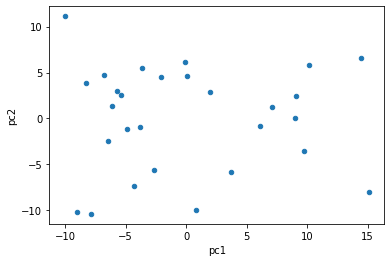

In [42]:
# We could do a quick visualization by plotting the principal components against each other in a scatter plot
df_components.plot.scatter(x='pc1', y='pc2')

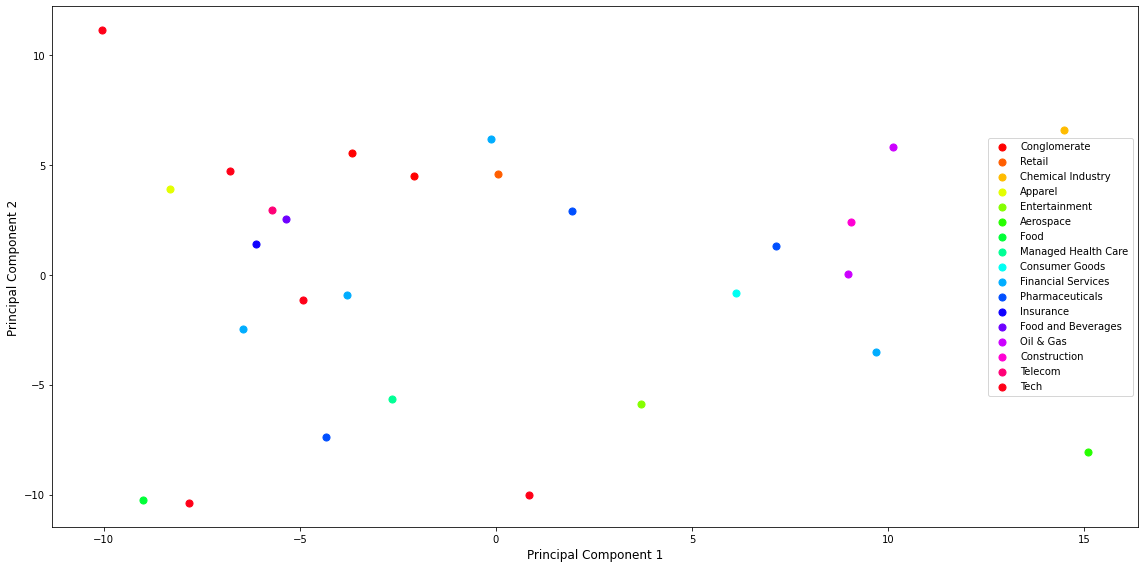

In [62]:
import matplotlib.pyplot as plt

# we can add the sector information to each stock and replot the principal components.
# add sector information
df_components['sector'] = DJI['Sector']

# get unique sectors
sectors = list(set(DJI['Sector'].tolist()))

# plot
fig=plt.figure(figsize = (16,8))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 12)
ax.set_ylabel('Principal Component 2', fontsize = 12)
cmap = plt.cm.get_cmap('hsv', len(sectors))
for i in range(len(sectors)):
    ax.scatter(
        x=df_components[df_components['sector'] == sectors[i]]['pc1'],
        y=df_components[df_components['sector'] == sectors[i]]['pc2'],
        c=np.array(cmap(i)).reshape(1,-1),
        s=50
    )
ax.legend(sectors)
plt.tight_layout()
plt.show()

# We can see that just among these 30 stocks, stocks of the same sector tend to cluster together. 
# This would be even clearer if more stocks were added to the analysis.

<AxesSubplot:>

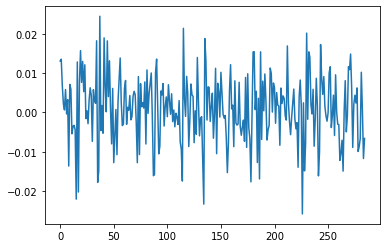

In [65]:
weights = abs(df_components['pc1'])/sum(abs(df_components['pc1']))
df_plot = pd.DataFrame(daily_returns_trans.loc[DJI_symbols, :])
df_plot['weights'] = weights.tolist()

# iterate through each column except weights
for i in range(df_plot.shape[1] - 1):
    df_plot.iloc[:, i] = df_plot.iloc[:, i] * df_plot['weights']
    
# drop weights column
df_plot = df_plot.drop(['weights'], axis = 1)
df_plot.transpose().sum(1).plot()

<AxesSubplot:>

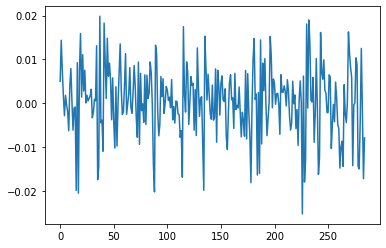

In [67]:
df_daily_returns['DIA'].plot()